Source: https://www.youtube.com/watch?v=QIUxPv5PJOY&t=248s

In [43]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
#Obtain stocks data
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-07-26,149.830002,147.699997,148.270004,148.990005,72269700.0,148.990005
2021-07-27,149.210007,145.550003,149.119995,146.770004,103580300.0,146.770004
2021-07-28,146.970001,142.539993,144.809998,144.979996,118931200.0,144.979996


In [45]:
df.shape

(2410, 6)

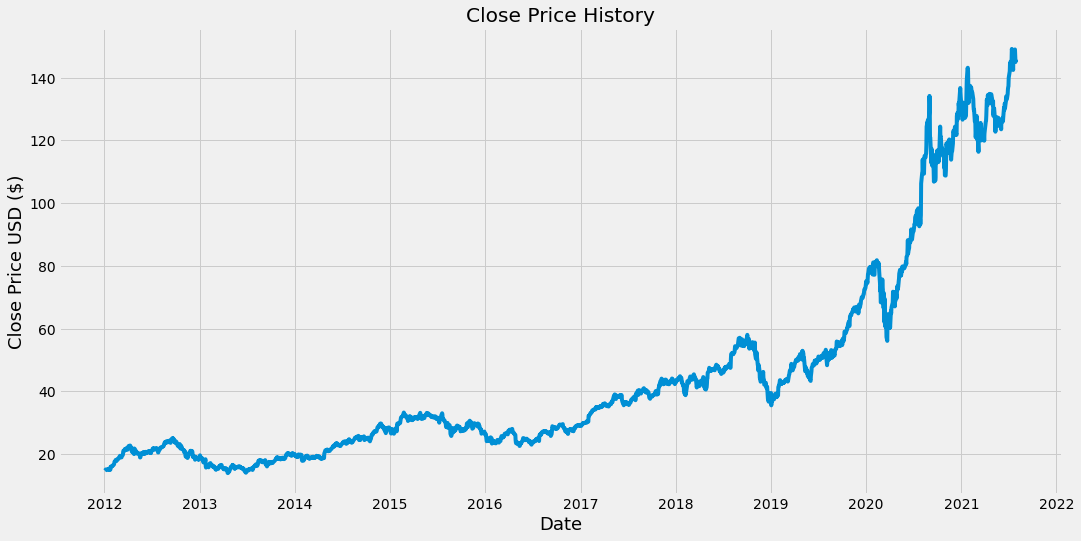

In [46]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [64]:
#Obtain only close data
data = df.filter(['Close'])
dataset = data.values
train_len = math.ceil(len(dataset)*.8)
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2021-07-26,148.990005
2021-07-27,146.770004
2021-07-28,144.979996


In [48]:
#Rescale data to fit to a 0 to 1 scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00546799],
       [0.00605176],
       [0.00726423],
       ...,
       [0.96915739],
       [0.97403898],
       [0.97566618]])

In [70]:
#Create training set
train = scaled_data[0:train_len]
x_train = []
y_train = []

#Create arrays containing close data of 60-day intervals
for i in range(60, len(train)):
    x_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    #if i<= 61:
    #    print(x_train)
    #    print(y_train)
    #    print()
x_train[0], y_train[0], x_train[1]

(array([0.00546799, 0.00605176, 0.00726423, 0.00841859, 0.0082416 ,
        0.00864048, 0.00845821, 0.00815179, 0.00773442, 0.00902614,
        0.01019106, 0.00983181, 0.00786386, 0.009742  , 0.00789292,
        0.01482696, 0.01429074, 0.01499074, 0.01650434, 0.01742095,
        0.01734435, 0.01706171, 0.01826625, 0.01939947, 0.02068326,
        0.02275687, 0.02711277, 0.02717881, 0.02960375, 0.03141584,
        0.02830147, 0.02950072, 0.02947695, 0.03283963, 0.03236151,
        0.03324642, 0.03483663, 0.03572155, 0.03827064, 0.04012763,
        0.04066387, 0.04085142, 0.0376763 , 0.03691024, 0.03702383,
        0.04000878, 0.04084879, 0.04265296, 0.04690583, 0.05257986,
        0.05151796, 0.0515206 , 0.05562292, 0.05690671, 0.05599273,
        0.05515801, 0.05428894, 0.05717614, 0.0591573 , 0.05998674]),
 0.05793690333412359,
 array([0.00605176, 0.00726423, 0.00841859, 0.0082416 , 0.00864048,
        0.00845821, 0.00815179, 0.00773442, 0.00902614, 0.01019106,
        0.00983181, 0.00

In [50]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1868, 60, 1)

In [52]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1868/1868 [==============================] - 23s 11ms/step - loss: 3.4088e-04


In [55]:
test_data = scaled_data[train_len-60: , :]
x_test = []
y_test = dataset[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [56]:
x_test = np.array(x_test)

In [57]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)
print(y_test)

[[ 51.08076 ]
 [ 51.063023]
 [ 51.14325 ]
 [ 51.4101  ]
 [ 51.71846 ]
 [ 52.03285 ]
 [ 52.39616 ]
 [ 52.985725]
 [ 53.56159 ]
 [ 53.873615]
 [ 54.060833]
 [ 54.18902 ]
 [ 54.34803 ]
 [ 54.425617]
 [ 54.332638]
 [ 54.21811 ]
 [ 54.073135]
 [ 54.06901 ]
 [ 54.087048]
 [ 54.075695]
 [ 54.25328 ]
 [ 54.511395]
 [ 54.55138 ]
 [ 54.56154 ]
 [ 54.792126]
 [ 55.085026]
 [ 55.258945]
 [ 55.453903]
 [ 55.742554]
 [ 56.26163 ]
 [ 56.78612 ]
 [ 57.208973]
 [ 57.480854]
 [ 57.675087]
 [ 57.84492 ]
 [ 58.134274]
 [ 58.40842 ]
 [ 58.758877]
 [ 59.102444]
 [ 59.50577 ]
 [ 59.966625]
 [ 60.155563]
 [ 60.195568]
 [ 60.375168]
 [ 60.86095 ]
 [ 61.47076 ]
 [ 62.02655 ]
 [ 62.47478 ]
 [ 62.887875]
 [ 63.244385]
 [ 63.59838 ]
 [ 63.88377 ]
 [ 64.19206 ]
 [ 64.38841 ]
 [ 64.62858 ]
 [ 64.90127 ]
 [ 65.11438 ]
 [ 65.148   ]
 [ 65.054   ]
 [ 64.91148 ]
 [ 64.95273 ]
 [ 64.98794 ]
 [ 65.16032 ]
 [ 65.34333 ]
 [ 65.38394 ]
 [ 65.1737  ]
 [ 64.97881 ]
 [ 64.970856]
 [ 65.248314]
 [ 65.45921 ]
 [ 65.67313 ]
 [ 65.

In [59]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.637141722366523

<ipython-input-60-51737fc7acac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


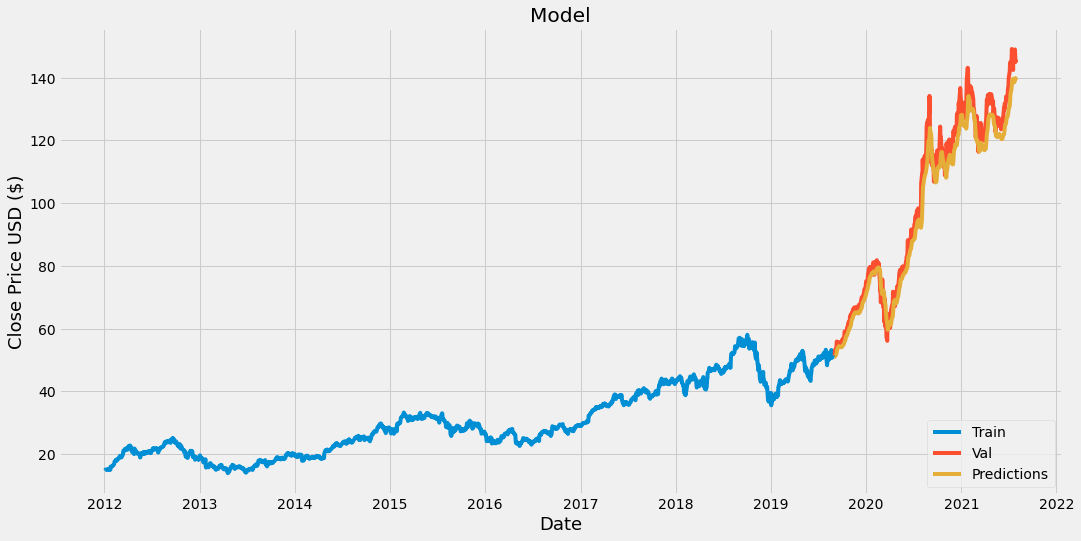

In [60]:
train1 = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train1['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [61]:
valid

,Close,Predictions
Date,,
2019-09-03,51.424999,51.080761
2019-09-04,52.297501,51.063023
2019-09-05,53.320000,51.143250
2019-09-06,53.314999,51.410099
2019-09-09,53.542500,51.718460
...,...,...
2021-07-26,148.990005,139.012527
2021-07-27,146.770004,139.651489
2021-07-28,144.979996,139.862152


In [71]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-07-29')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[139.26538]]
